# **Anatomical Recognition - x-ray body parts classification**
### **Abdallah Fekry**
**Model 3**

---

class 0 = Chest

class 1 = Feet

class 2 = Hand

class 3 = Nick

class 4 = Other

class 5 = Skull

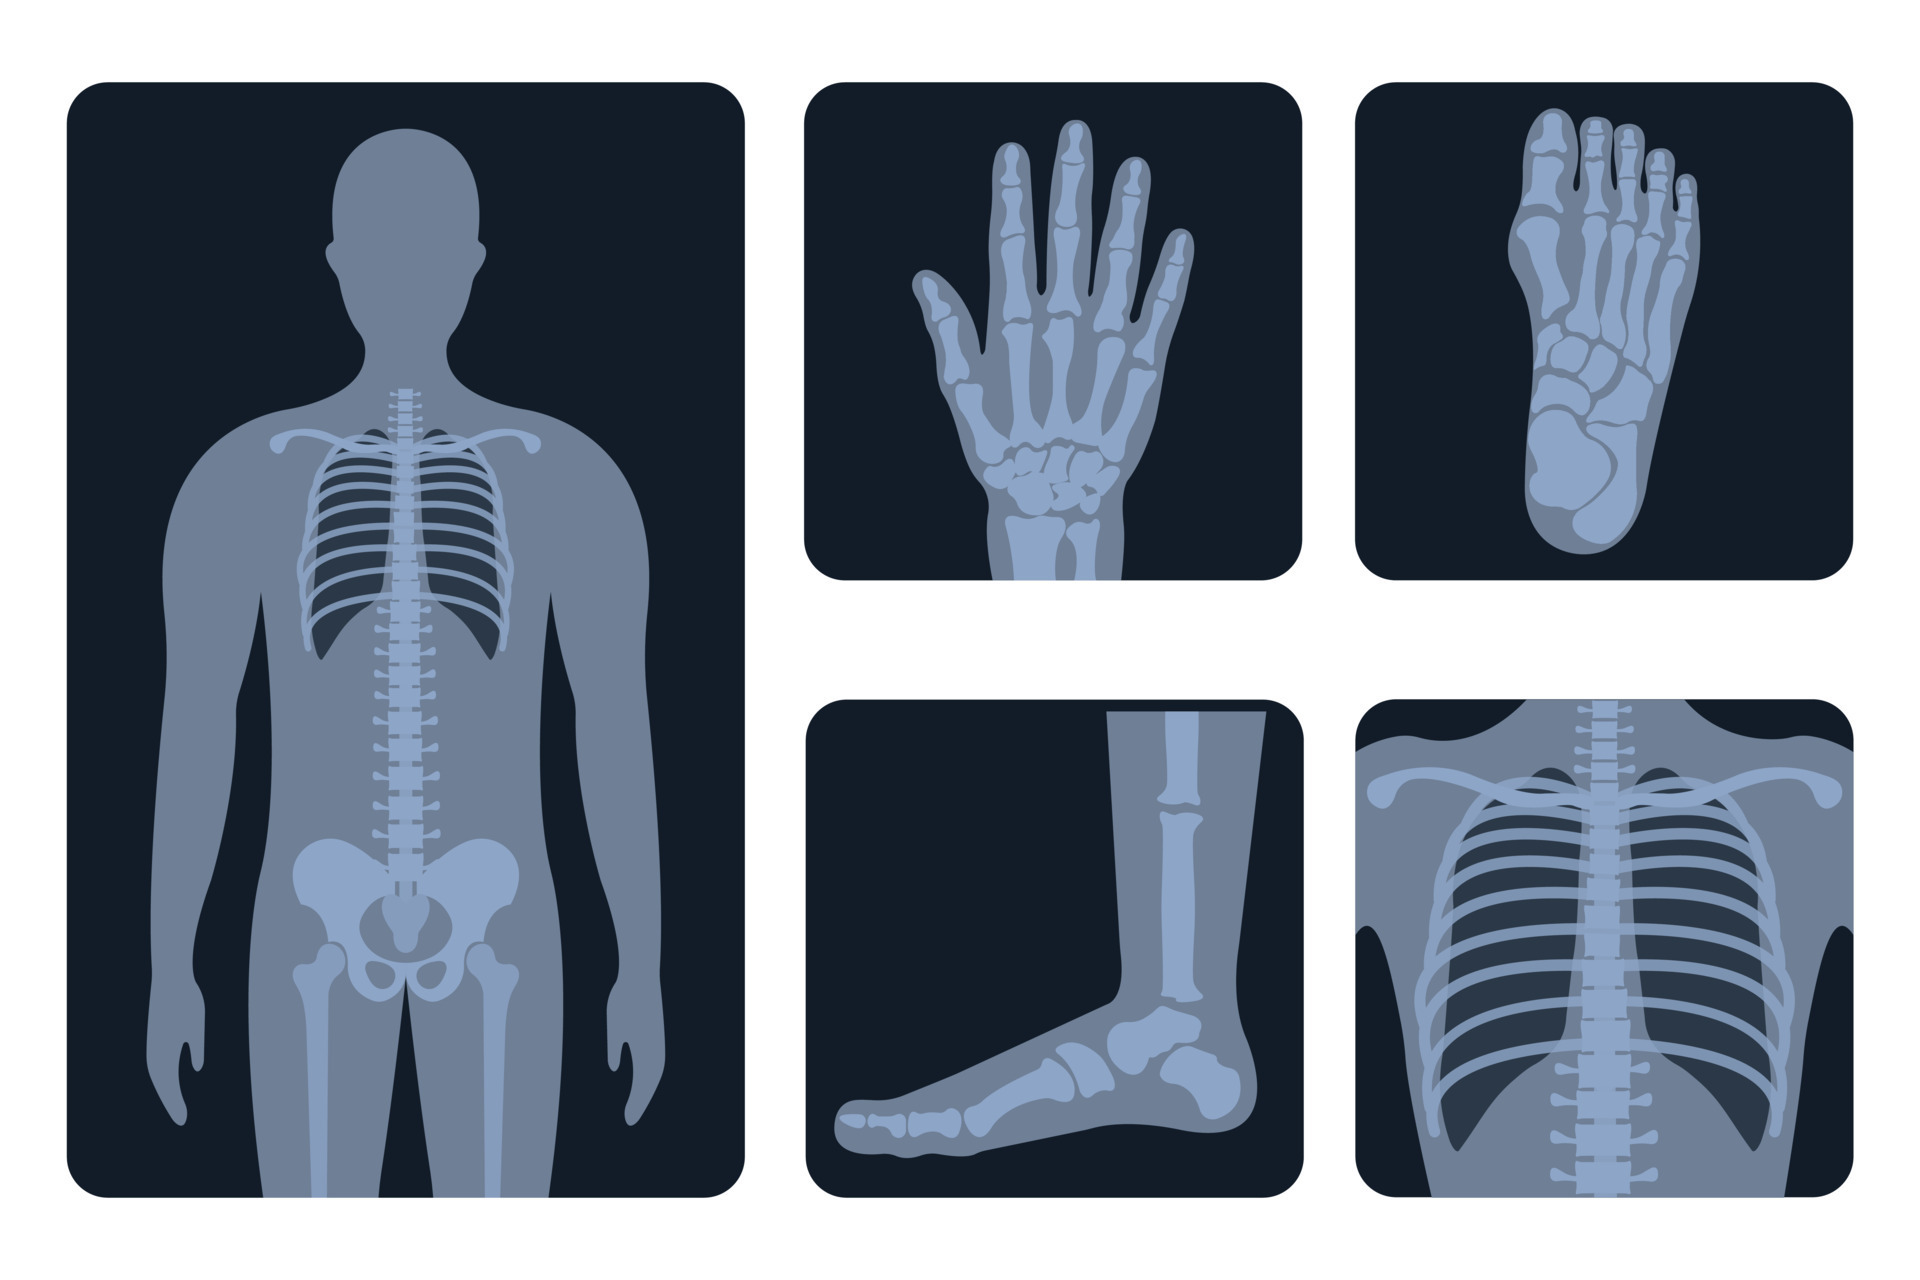

importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix

In [4]:
values = {0:'Chest x-ray',1:'Feet x-ray',2:'Hand x-ray',3:'Nick x-ray',4:'Other:unsuported x-ray type!',5:'Skull x-ray'}
values[0]

'Chest x-ray'

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory('/kaggle/input/x-ray-body-parts/test body parts/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False)
test_data = train_datagen.flow_from_directory('/kaggle/input/x-ray-body-parts/test body parts/Test',
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=False)

Found 970 images belonging to 6 classes.
Found 63 images belonging to 6 classes.


In [6]:
np.unique(train_data.labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

train_data.class_indices

In [7]:
train_data.image_shape

(224, 224, 3)

In [8]:
train_data.class_indices

{'Chest': 0, 'Feet': 1, 'Hand': 2, 'Other': 3, 'Skull': 4, 'nick': 5}

In [9]:
vgg16_model = vgg16.VGG16(include_top=False, input_shape=(224,224,3))
vgg16_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [10]:
for layer in vgg16_model.layers[:]:
  layer.trainable = False
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 4096)              102764544 
                                                                 
 dense_1 (Dense)             (None, 4096)              16781312  
                                                                 
 dropout (Dropout)           (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 24582     
                                                                 
Total params: 134285126 (512.26 MB)
Trainable params: 11

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
from tensorflow import keras
results = model.fit(train_data, epochs=50, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks=keras.callbacks.EarlyStopping(patience=5,monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/50


I0000 00:00:1709339668.270712     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


31/31 [==============================] - 33s 658ms/step - loss: 8.7929 - accuracy: 0.4206 - val_loss: 1.4877 - val_accuracy: 0.6508
Epoch 2/50
31/31 [==============================] - 6s 177ms/step - loss: 2.2078 - accuracy: 0.5680 - val_loss: 0.7816 - val_accuracy: 0.7460
Epoch 3/50
31/31 [==============================] - 6s 174ms/step - loss: 1.0547 - accuracy: 0.6247 - val_loss: 0.5934 - val_accuracy: 0.7778
Epoch 4/50
31/31 [==============================] - 6s 176ms/step - loss: 0.8659 - accuracy: 0.7258 - val_loss: 0.5822 - val_accuracy: 0.7937
Epoch 5/50
31/31 [==============================] - 6s 177ms/step - loss: 0.7790 - accuracy: 0.7423 - val_loss: 1.0312 - val_accuracy: 0.8095
Epoch 6/50
31/31 [==============================] - 5s 159ms/step - loss: 0.8137 - accuracy: 0.7887 - val_loss: 0.7187 - val_accuracy: 0.7460
Epoch 7/50
31/31 [==============================] - 5s 155ms/step - loss: 1.0000 - accuracy: 0.8021 - val_loss: 0.5425 - val_accuracy: 0.7619
Epoch 8/50
31/31

In [13]:
model.save('model2.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
loss , acc = model.evaluate(test_data)

2/2 [==============================] - 0s 152ms/step - loss: 0.0718 - accuracy: 1.0000


In [15]:
print('Test accuracy = ',round(acc*100,2),'%\nLoss = ',loss,sep='')

Test accuracy = 100.0%
Loss = 0.07177892327308655


In [16]:
yp = (model.predict(test_data))

2/2 [==============================] - 0s 149ms/step


In [17]:
yp = yp.argmax(axis=1)
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5])

In [18]:
yp.shape

(63,)

Chest Sample


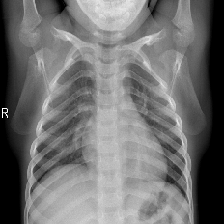

In [19]:
print("Chest Sample")
chest = load_img('/kaggle/input/x-ray-body-parts/test body parts/Test/Chest/NORMAL_481.png',target_size=(224,224))
# plt.imshow()
chest

Hand Sample


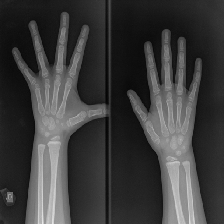

In [20]:
print('Hand Sample')
hand = load_img('/kaggle/input/x-ray-body-parts/test body parts/Test/Hand/1.2.826.0.1.3680043.8.498.64640774339692622642370766769649236555-c.png',target_size=(224,224))
# plt.imshow(img_normal)
hand

Feet Sample


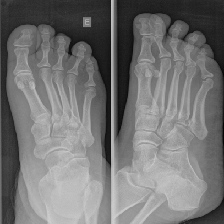

In [21]:
print('Feet Sample')
feet = load_img('/kaggle/input/x-ray-body-parts/test body parts/Test/Feet/1.2.826.0.1.3680043.8.498.85495648454557212778626951012483148545-c.png',target_size=(224,224))
# plt.imshow(img_normal)
feet

Text(0.5, 1.0, 'Feet')

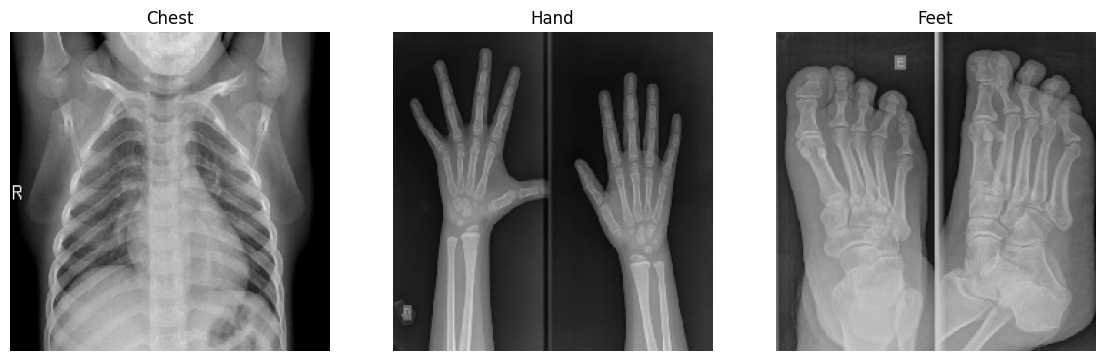

In [23]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 3, 1)
plt.axis('off')
plt.imshow(chest)
plt.title('Chest')
fig.add_subplot(1, 3, 2)
plt.axis('off')
plt.imshow(hand)
plt.title('Hand')
fig.add_subplot(1, 3, 3)
plt.axis('off')
plt.imshow(feet)
plt.title('Feet')

In [24]:
chest = img_to_array(chest)
hand = img_to_array(hand)
feet = img_to_array(feet)
chest = chest/255
hand = hand/255
feet = feet/255
chest = chest.reshape(1,224,224,3)
hand = hand.reshape(1,224,224,3)
feet = feet.reshape(1,224,224,3)
print(chest.shape, hand.shape, feet.shape, sep='\n')

(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


In [25]:
df = pd.DataFrame({'filename':test_data.filenames,'y_actual':test_data.classes,'Y_pred':yp})
df

,filename,y_actual,Y_pred
0,Chest/NORMAL_481.png,0,0
1,Chest/NORMAL_482.png,0,0
2,Chest/NORMAL_483.png,0,0
3,Chest/NORMAL_484.png,0,0
4,Chest/NORMAL_485.png,0,0
...,...,...,...
58,nick/1.2.826.0.1.3680043.8.498.118208736609354...,5,5
59,nick/1.2.826.0.1.3680043.8.498.119527808701454...,5,5
60,nick/1.2.826.0.1.3680043.8.498.120569464493823...,5,5
61,nick/1.2.826.0.1.3680043.8.498.122350883386495...,5,5


In [26]:
p1 = (model.predict(chest)).argmax(axis=1)[0]
print("class ",p1,": ",values[p1],sep='')

1/1 [==============================] - 1s 1s/step
class 0: Chest x-ray


In [27]:
p1 = (model.predict(hand)).argmax(axis=1)[0]
print("class ",p1,": ",values[p1],sep='')

1/1 [==============================] - 0s 19ms/step
class 2: Hand x-ray


In [28]:
p1 = (model.predict(feet)).argmax(axis=1)[0]

print("class ",p1,": ",values[p1],sep='')

1/1 [==============================] - 0s 19ms/step
class 1: Feet x-ray


In [29]:
test_data.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5],
      dtype=int32)

In [30]:
m = confusion_matrix(test_data.labels,yp)
m

array([[36,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  6]])

Image Sample
(1, 224, 224, 3)
1/1 [==============================] - 0s 22ms/step
class 1: Feet x-ray


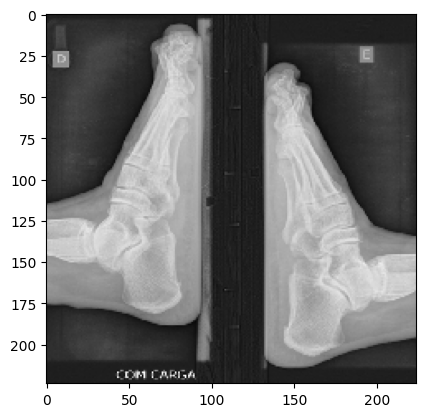

In [31]:
print('Image Sample')
img = load_img('/kaggle/input/xray-body-type/xray body type me/train/6/1.2.826.0.1.3680043.8.498.10159498614160056038769051549755437120-c.png',target_size=(224,224))
plt.imshow(img)
# img
img = img_to_array(img)
img = img/255
img = img.reshape(1,224,224,3)
print(img.shape)
p1 = (model.predict(img)).argmax(axis=1)[0]
print("class ",p1,": ",values[p1],sep='')

Image Sample
(1, 224, 224, 3)
1/1 [==============================] - 0s 19ms/step
class 1: Feet x-ray


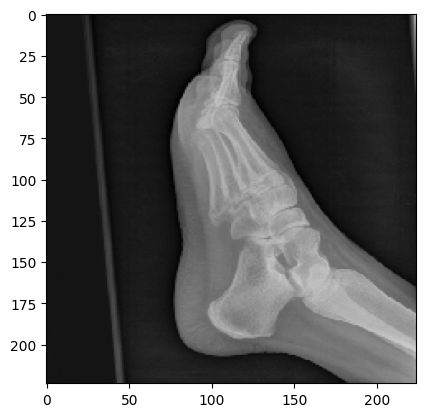

In [32]:
print('Image Sample')
img = load_img('/kaggle/input/xray-body-type/xray body type me/train/6/1.2.826.0.1.3680043.8.498.36297927420988222626817649882454806433-c.png',target_size=(224,224))
plt.imshow(img)
# img
img = img_to_array(img)
img = img/255
img = img.reshape(1,224,224,3)
print(img.shape)
p1 = (model.predict(img)).argmax(axis=1)[0]
print("class ",p1,": ",values[p1],sep='')

Image Sample
(1, 224, 224, 3)
1/1 [==============================] - 0s 18ms/step
class 0: Chest x-ray


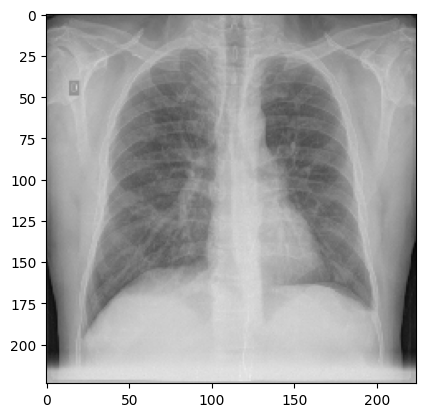

In [33]:
print('Image Sample')
img = load_img('/kaggle/input/xray-body-type/xray body type me/train/3/1.2.826.0.1.3680043.8.498.10053309524595490852815579052225336016-c.png',target_size=(224,224))
plt.imshow(img)
# img
img = img_to_array(img)
img = img/255
img = img.reshape(1,224,224,3)
print(img.shape)
p1 = (model.predict(img)).argmax(axis=1)[0]
print("class ",p1,": ",values[p1],sep='')

Heatmap



<Axes: xlabel='Predicted', ylabel='Actual'>

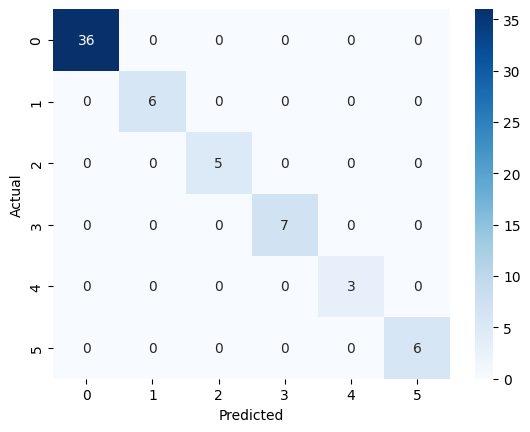

In [34]:
print("Heatmap\n")
m = pd.crosstab(test_data.labels, yp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(m, annot=True, cmap='Blues')

---

downloading model

In [35]:
%cd /kaggle/working
from IPython.display import FileLink
FileLink(r'model2.h5')

/kaggle/working


/kaggle/working/model2.h5